# Analisis de Marketing
***

PREGUNTA:
"Quin és l’impacte del tipus de contacte (mòbil, telefònic o desconegut) sobre la taxa de conversió (deposit), i com podem ajustar les nostres estratègies de comunicació en funció d'aquests resultats?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/df_250519.csv")
print(df.head())
print(df.shape)
print(df['deposit'].unique())
print(df['contact'].unique())

custom_palette = ["#2CCED1", "#5F6F81", "#AABBC8", "#DCE3EA", "#2E2F36"]



   Unnamed: 0  id  age         job  marital  education  default  balance  \
0           0   1   59      admin.  married  secondary    False     2343   
1           1   2   59      admin.  married  secondary    False     2343   
2           2   3   56      admin.  married  secondary    False       45   
3           3   4   41  technician  married  secondary    False     1270   
4           4   5   55    services  married  secondary    False     2476   

   housing   loan  contact  day month  duration  campaign  pdays  previous  \
0     True  False  unknown    5   May      1042         1     -1         0   
1     True  False  unknown    5   May      1042         1     -1         0   
2    False  False  unknown    5   May      1467         1     -1         0   
3     True  False  unknown    5   May      1389         1     -1         0   
4     True  False  unknown    5   May       579         1     -1         0   

  poutcome  deposit        date  
0  unknown     True  2024-05-05  
1  unk

In [2]:

# Calcular tasa de conversión por tipo de contacto
conversion_rate = df.groupby('contact')['deposit'].mean().sort_values(ascending=False) * 100

# Mostrar los resultados redondeados
print("Taxa de conversió per tipus de contacte (%):\n")
print(conversion_rate.round(2))



Taxa de conversió per tipus de contacte (%):

contact
cellular     54.45
telephone    51.52
unknown      23.25
Name: deposit, dtype: float64


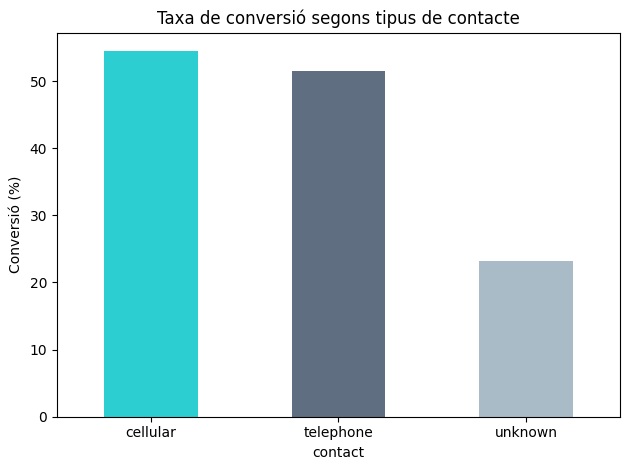

In [3]:
import matplotlib.pyplot as plt

conversion_rate.plot(kind='bar', color=custom_palette[:3], title='Taxa de conversió segons tipus de contacte', ylabel='Conversió (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Interpretación de los resultados

El gráfico muestra la tasa de conversión (deposit) según el tipo de contacto utilizado en la campaña de marketing.<br> <ul>
<li><b> Cellular (móvil) </b> presenta la tasa de conversión más alta (54,45%), lo que sugiere que los contactos por móvil son especialmente eficaces para convertir clientes. <br>
<li><b> Telephone (teléfono fijo) </b> también ofrece una tasa significativa (51,52%), ligeramente inferior a la del móvil.<br> </li> </ul>

***


¿Qué proporción de personas fueron contactadas por cada canal?

<Axes: title={'center': 'Distribució dels tipus de contacte'}, ylabel='proportion'>

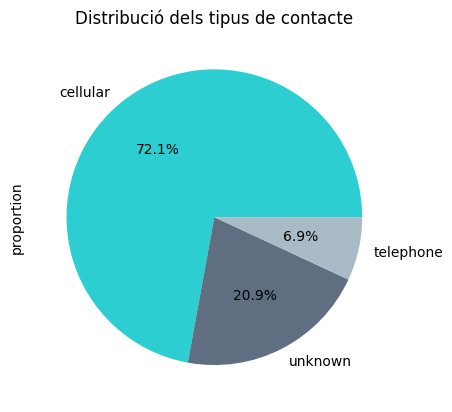

In [12]:
df['contact'].value_counts(normalize=True).plot(
    kind='pie', colors=custom_palette[:df['contact'].nunique()], autopct='%1.1f%%', title='Distribució dels tipus de contacte')


### Interpretación de los resultados

El gráfico muestra la tasa de conversión (deposit) según el tipo de contacto utilizado en la campaña de marketing.<br> <ul>
<li><b> El 72,1%  </b> de los contactos se realizaron por móvil (cellular) <br>
<li><b> Solo el 6,9% </b> ueron por teléfono fijo (telephone)<br>
<li><b>El 20,9% </b> fueron a través de canal desconocido (unknown). <br> </li> </ul>

Esto sugiere que la empresa prioriza el canal móvil en sus campañas, aunque hay un porcentaje importante sin especificar (unknown), lo que podría implicar problemas de registro o integridad de datos.

***

¿Qué tipo de contacto convierte mejor y con qué perfil de edad?

In [5]:
df.groupby('contact')[['deposit', 'age']].agg({
    'deposit': 'mean',
    'age': 'mean'
}).rename(columns={
    'deposit': 'taxa_conversió',
    'age': 'edat_mitjana'
}).round(2)



,taxa_conversió,edat_mitjana
contact,,
cellular,0.54,40.54
telephone,0.52,50.34
unknown,0.23,40.15


### Interpretación de los resultados
<ul>
<li>El canal móvil (cellular) convierte mejor, especialmente en un rango de edad medio (~40 años). <br>
<li>Telephone tiene una conversión similar pero con un público más mayor (~50 años).<br>
<li>El canal unknown, además de ser poco claro, convierte menos y está ligado a una edad media similar a cellular. <br> </li> </ul>

<b>Recomendaciones complementarias </b> <ul>
<li>Ajustar las campañas según perfil de edad: Considerar que el teléfono fijo puede ser más efectivo para perfiles mayores. <br>
<li>Limpieza de canal unknown: Dado que convierte mucho peor y representa un 20% de los contactos, es urgente mejorar la calidad de los registros. <br>
<li>Potenciar el canal móvil, ya que lidera tanto en volumen como en tasa de conversión. <br> </li> </ul>

***

¿Ciertos tipos de contacto funcionan mejor con cierto nivel educativo?

In [6]:
pd.crosstab(df['education'], df['contact'],
            values=df['deposit'], aggfunc='mean').round(2)


contact,cellular,telephone,unknown
education,,,
primary,0.48,0.50,0.19
secondary,0.52,0.48,0.24
tertiary,0.59,0.58,0.26
unknown,0.61,0.57,0.22


### Interpretación de los resultados
<ul>
<li>El canal móvil (cellular) muestra mejor conversión en todos los niveles educativos, especialmente en los más altos (tertiary).<br>
<li>El canal telephone es competitivo para niveles más altos, pero no tan constante.<br>
</li> </ul>

***

¿Que dia del mes convierte más? Si los dias de la semana afectaban, vamos a comprobar tambien estos datos.

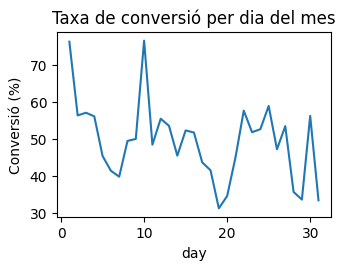

In [7]:
plt.subplot(2, 2, 4)
day_conversion = df.groupby('day')['deposit'].mean() * 100
day_conversion.plot(kind='line', title='Taxa de conversió per dia del mes', ylabel='Conversió (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Interpretación de los resultados
El gráfico de línea muestra fluctuaciones en la conversión según el día del mes en que se realizó el contacto.<ul>
<li>Se observan picos claros de conversión en los primeros días del mes, puede que por planificación.<br>
<li>La conversión baja notablemente en ciertos días (como el 10 o 31), lo que podría estar relacionado con periodos de menor disponibilidad de los usuarios o fatiga en campañas largas.<br>
<li>Esto sugiere que la planificación del día del contacto puede tener un impacto real en la efectividad de la campaña.  <br> </li> </ul>

***

¿Qué pasa si alguien tiene hipoteca o préstamo y lo contactamos por un canal?

In [8]:
pd.crosstab(df['contact'], df['loan'],
            values=df['deposit'], aggfunc='mean').round(2)


loan,False,True
contact,,
cellular,0.57,0.37
telephone,0.54,0.29
unknown,0.24,0.21


### Interpretación de los resultados
<ul>
<li>Las personas sin préstamo convierten significativamente mejor que las que sí tienen uno, independientemente del canal.<br>
<li>El canal móvil sigue siendo el más eficaz, incluso entre quienes tienen préstamos.<br>
<li><b>Recomendación:</b> segmentar las campañas según situación financiera. Las personas sin préstamos parecen más receptivas a las ofertas del banco. <br> </li> </ul>

***

## Test Chi-cuadrado de independencia
Este test sirve para evaluar si existe una asociación significativa entre dos variables categóricas: en este caso, contact y deposit.
Si p < 0.05, puedes decir que sí hay una relación estadísticamente significativa entre contact y deposit.

Si p ≥ 0.05, no hay evidencia suficiente para afirmar que el tipo de contacto afecta a la conversión.

In [9]:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla = pd.crosstab(df['contact'], df['deposit'])
print("Tabla de contingencia:\n", tabla)

# Test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"\nChi² = {chi2:.2f}, p-valor = {p:.4f}")



Tabla de contingencia:
 deposit    False  True 
contact                
cellular    5310   6348
telephone    543    577
unknown     2598    787

Chi² = 1030.72, p-valor = 0.0000


### Interpretación:
Como el p-valor < 0.05, hay evidencia estadística muy fuerte para afirmar que el tipo de contacto afecta significativamente a la probabilidad de conversión (deposit).
